In [1]:
import csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<div style="font-size: 24px;">Handling Missing Values</div>

In [3]:
df = pd.read_csv("books.csv")
df.isnull().sum()

id                0
title             0
authors           7
languages         0
subjects          0
copyright         0
media_type        0
download_count    0
dtype: int64

Fill the missing values ​​of authors with Unknown

In [4]:
df["authors"] = df["authors"].fillna("unknown")
df.isnull().sum()

id                0
title             0
authors           0
languages         0
subjects          0
copyright         0
media_type        0
download_count    0
dtype: int64

<div style="font-size: 15px;">Store the data for each language in a separate file</div>

In [6]:
fin = open("books.csv", "r",encoding='utf-8')
books = csv.DictReader(fin)
rows_de = []
for row in books:
    languages = row['languages'].split('; ')
    if 'de' in languages:
        rows_de.append(row)
fin.close()
fieldnames = ['id','title', 'authors','languages', 'subjects','copyright','media_type','download_count']
fout = open("books_de.csv", "w", encoding = 'utf-8',newline = '')
writer = csv.DictWriter(fout, fieldnames=fieldnames)
writer.writeheader()
writer.writerows(rows_de)
fout.close()
len(rows_de)

51

In [7]:
fin = open("books.csv", "r",encoding='utf-8')
books = csv.DictReader(fin)
rows_fi = []
for row in books:
    languages = row['languages'].split('; ')
    if 'fi' in languages:
        rows_fi.append(row)
fin.close()
fieldnames = ['id','title', 'authors','languages', 'subjects','copyright','media_type','download_count']
fout = open("books_fi.csv", "w", encoding = 'utf-8',newline = '')
writer = csv.DictWriter(fout, fieldnames=fieldnames)
writer.writeheader()
writer.writerows(rows_fi)
fout.close()
len(rows_fi)

2

In [8]:
fin = open("books.csv", "r",encoding='utf-8')
books = csv.DictReader(fin)
rows_fr = []
for row in books:
    languages = row['languages'].split('; ')
    if 'fr' in languages:
        rows_fr.append(row)
fin.close()
fieldnames = ['id','title', 'authors','languages', 'subjects','copyright','media_type','download_count']
fout = open("books_fr.csv", "w", encoding = 'utf-8',newline = '')
writer = csv.DictWriter(fout, fieldnames=fieldnames)
writer.writeheader()
writer.writerows(rows_fr)
fout.close()
len(rows_fr)

75

<div style="font-size: 15px;">produce a single  Pandas Data Frames for each language which we can analyse later on:</div>

In [10]:
df_de = pd.read_csv("books_de.csv")
df_fi = pd.read_csv("books_fi.csv")
df_fr = pd.read_csv("books_fr.csv")

<div style="font-size: 24px;">Data Analysis</div>

Analysis in three languages

In [13]:
df["languages"].value_counts()

languages
fr            72
de            50
en; fr         2
fi             2
de; en         1
en; es; fr     1
Name: count, dtype: int64

In [14]:
languages = ["de","fi","fr"]
total_download = [df_de['download_count'].sum(),df_fi['download_count'].sum(),df_fr['download_count'].sum()]
max_download = [df_de['download_count'].max(),df_fi['download_count'].max(),df_fr['download_count'].max()]
min_download = [df_de['download_count'].min(),df_fi['download_count'].min(),df_fr['download_count'].min()]
mean_download = [df_de['download_count'].mean(),df_fi['download_count'].mean(),df_fr['download_count'].mean()]
d1 = {"total_download":total_download,"max_download":max_download,"min_download":min_download,"mean_download":mean_download}
d1 = pd.DataFrame(d1,index=languages)
d1.index.name = 'languages'
d1

,total_download,max_download,min_download,mean_download
languages,,,,
de,58654,9899,461,1150.078431
fi,1064,535,529,532.000000
fr,93029,9025,463,1240.386667


<div style="font-size: 18px;">Analyze downloads with a bar chart</div>

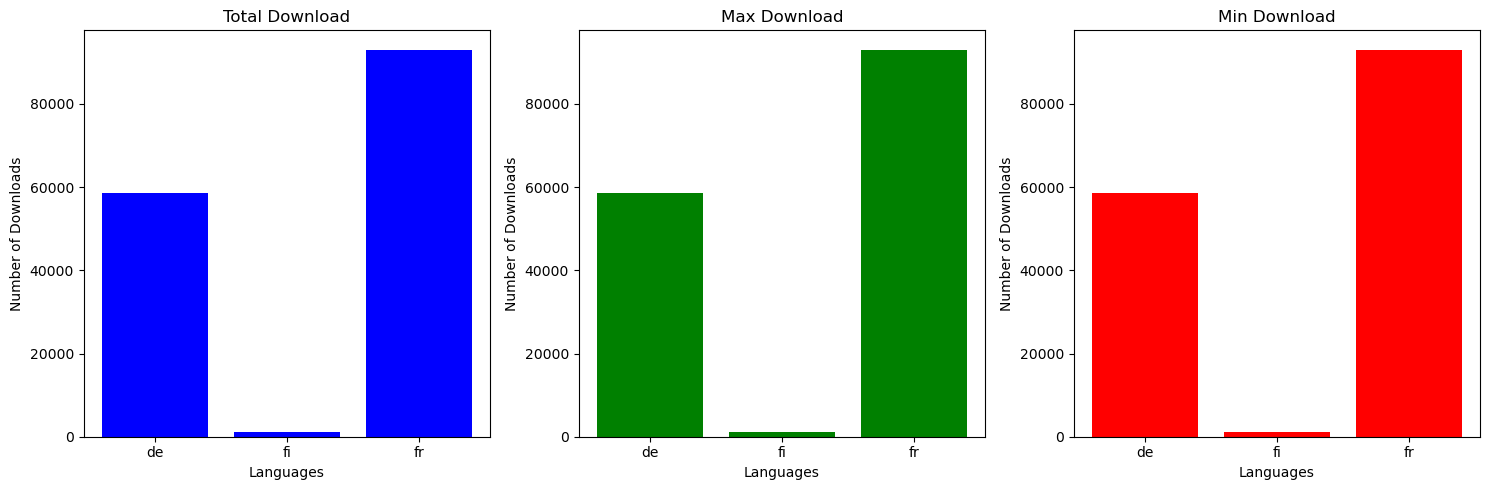

In [16]:
fig,axs = plt.subplots(1,3,figsize=(15,5))
axs[0].bar(d1.index,d1['total_download'],color='blue')
axs[0].set_title('Total Download')
axs[0].set_ylabel('Number of Downloads')
axs[0].set_xlabel('Languages')

axs[1].bar(d1.index,d1['total_download'],color='green')
axs[1].set_title('Max Download')
axs[1].set_ylabel('Number of Downloads')
axs[1].set_xlabel('Languages')

axs[2].bar(d1.index,d1['total_download'],color='red')
axs[2].set_title('Min Download')
axs[2].set_ylabel('Number of Downloads')
axs[2].set_xlabel('Languages')
plt.tight_layout()
plt.show()

In this analysis, we analyzed total_download, max_download and min_download for the three languages, and concluded that French books had the highest total downloads, while Finnish books had the lowest. German books had the highest single book downloads, while Finnish had the lowest. Finnish books had the highest single book downloads, while German books had the lowest.

<div style="font-size: 20px;">Analyze mean downloads with a pin chart</div>

Text(0, 0.5, '')

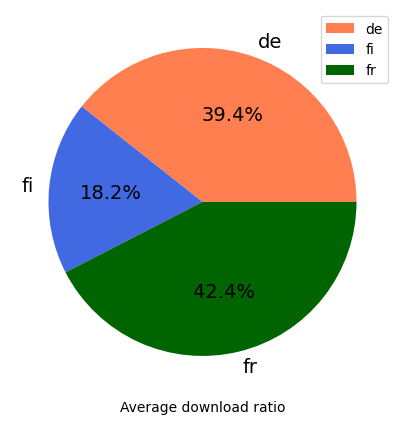

In [19]:
ax = d1['mean_download'].plot(kind="pie" ,figsize=(5,5), fontsize=14, autopct="%.1f%%",
                        colors=["coral", "royalblue", "darkgreen"])
plt.xlabel('Average download ratio')
plt.legend()
plt.ylabel('')

Among the books in the three languages ​​analyzed this time, the highest average download share was in French at 42.2%, and the lowest was in Finnish at 18.2%.

<div style="font-size: 20px;">Analyze the download volume of books on different subjects</div>

In [25]:
fin = open("books.csv", "r",encoding='utf-8')
books = csv.DictReader(fin)
fiction_downloads=0
poetry_downloads=0
children_downloads=0
download_types = [fiction_downloads,poetry_downloads,children_downloads]
for row in books:
    subjects = row['subjects']
    if 'Fiction' in subjects:
        fiction_downloads+=int(row['download_count'])
    if 'poetry' in subjects:
        poetry_downloads+=int(row['download_count'])
    if 'children' in subjects:
        children_downloads+=int(row['download_count'])
fin.close()

In [27]:
book_types=['Fiction','poetry','children']
d2 = {"download_count":[fiction_downloads,poetry_downloads,children_downloads]}
d2 = pd.DataFrame(d2,index=book_types)
d2.index.name = 'book_types'
d2

,download_count
book_types,
Fiction,69591
poetry,14887
children,4373


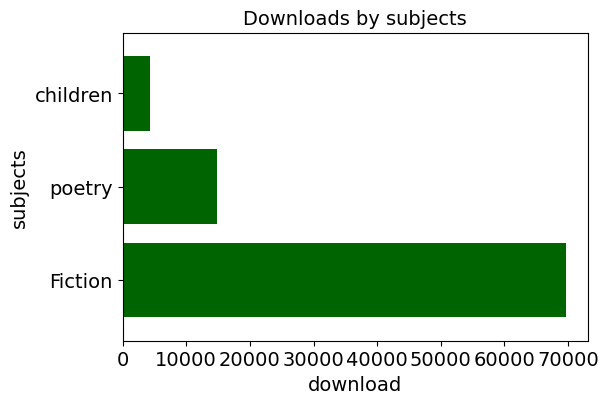

In [29]:
ax = d2["download_count"].plot(kind="barh", figsize=(6, 4), fontsize=14, color="darkgreen", width=0.8)
ax.set_xlabel("download", fontsize=14)
ax.set_ylabel("subjects", fontsize=14)
ax.set_title("Downloads by subjects", fontsize=14);

This chart shows three types of books: children, poetry, and novels. The most downloaded books are novels, followed by poetry, and the least downloaded are children.

<div style="font-size: 20px;">Proportion of copyright</div>

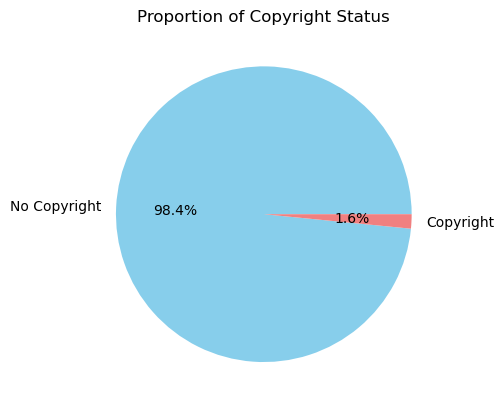

In [33]:
copyright_counts = df['copyright'].value_counts()
copyright_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], labels=['No Copyright', 'Copyright'])
plt.title('Proportion of Copyright Status')
plt.ylabel('')
plt.show()

This pie chart analyzes the proportion of copyrighted and uncopyrighted books. The proportion of uncopyrighted books is as high as 98.4%, while the proportion of copyrighted books is only 1.6%.

<div style="font-size: 20px;">Distribution of Media Types</div>

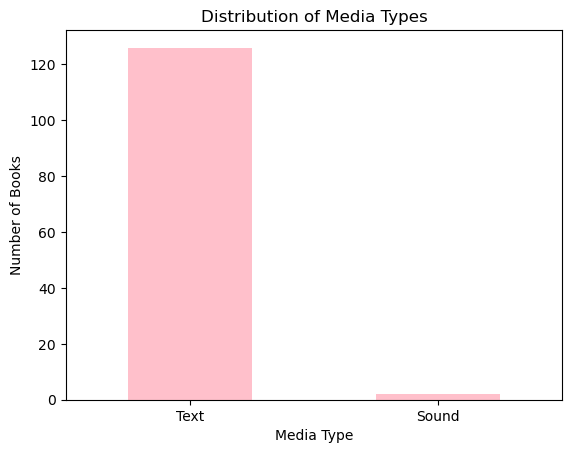

In [37]:
media_type_counts = df['media_type'].value_counts()
media_type_counts.plot(kind='bar', color='pink')
plt.title('Distribution of Media Types')
plt.xlabel('Media Type')
plt.ylabel('Number of Books')
plt.xticks(rotation=0)
plt.show()

This bar chart analyzes the number of each media type in these books. It can be seen that almost all media types are text, with only a small number of sound.

--------------------------------------------------------------------------------------------------------------------------------------------------------

<div style="font-size: 20px;">Conclusion</div>

In this assignment, we studied the 160 most popular books (in German, French, and Finnish), stored them separately in the three languages, and compared their total downloads. French books had the highest downloads, followed by German, and the lowest was Finnish. We also counted and compared the types of these books and found that fiction were the most popular type of books, followed by poetry, and finally children. When analyzing the copyright Proportion and media type of these books, we found that 98.4% of the books had no copyright, and almost all media types were text, with only a small amount of sound.

I think the biggest challenge of this assignment is that when downloading data, we have to consider which data will be counted and then save the data conditionally, because some attributes are useless for our statistics, and saving these attributes will make the data messy.

Some ways to further analyze

    ·In future analysis, more data can be added, including books in other languages ​​such as English, or data on other subjects.
    ·The publication dates of books can also be counted to see in which years the most books were published.